### Testing Neural Networks for wind generation prediction ###

Given a value of 10m wind speed, we want to predict the wind power generation.



In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# load the observed data
fpath = "/home/users/benhutch/unseen_multi_year/dfs/UK_clearheads_data_daily_1960_2018_ONDJFM.csv"

# load the data using pandas
df = pd.read_csv(fpath, index_col=0, parse_dates=True)

In [3]:
df.keys()


Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind'],
      dtype='object')

In [4]:
df

,solar_power,100m_wind_speed,10m_wind_speed,solar_irradiance,ofs_cfs,ons_cfs,t2m_no_detrend,t2m_2020_detrend,United_Kingdom_demand,United_Kingdom_wd_demand,wind_gen,demand_net_wind,wd_demand_net_wind
date,,,,,,,,,,,,,
1960-01-01,0.017302,7.625868,5.137020,47.696808,0.766016,0.298726,6.577980,7.835584,40.766836,41.666578,15.744187,25.022648,25.922391
1960-01-02,0.016300,4.930154,3.186221,44.535210,0.161353,0.101100,3.956466,5.214012,40.019199,43.863111,3.883881,36.135318,39.979230
1960-01-03,0.014511,7.249626,4.753627,39.765705,0.298246,0.266276,5.730921,6.988410,37.949476,42.640292,8.359369,29.590107,34.280923
1960-01-04,0.016632,9.558028,6.228839,46.044937,0.526643,0.363619,7.894082,9.151514,39.775870,40.584140,13.176714,26.599156,27.407426
1960-01-05,0.026247,8.874397,6.005377,71.949350,0.798906,0.376032,5.362875,6.620249,42.761398,42.761398,17.378747,25.382651,25.382651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,0.015141,4.950434,3.184127,41.870865,0.079966,0.103872,7.486191,7.507397,41.267638,41.267638,2.724134,38.543505,38.543505
2018-12-28,0.017052,6.609922,4.145258,47.274323,0.255848,0.223484,7.666619,7.687767,40.155592,41.055335,7.097603,33.057990,33.957732
2018-12-29,0.014874,8.852767,5.780409,41.420670,0.698416,0.504087,8.513406,8.534496,36.341629,40.185540,17.799579,18.542049,22.385961


Text(0, 0.5, 'Wind Generation (GW)')

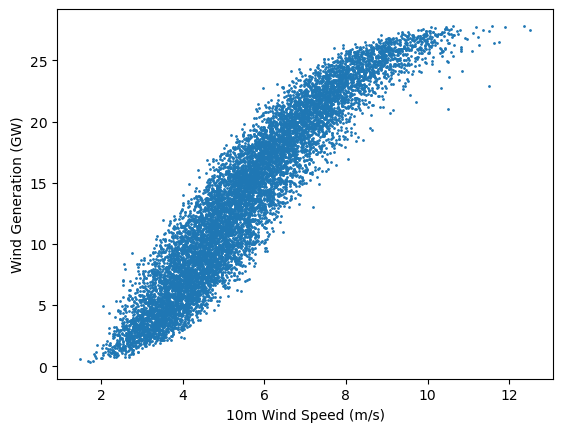

In [5]:
# plot a scatter of the 10m wind speed against wind generation
fig, ax = plt.subplots()

ax.scatter(df['10m_wind_speed'], df['wind_gen'], s=1)

# set the axis labels
ax.set_xlabel('10m Wind Speed (m/s)')

ax.set_ylabel('Wind Generation (GW)')

Give up on ML for now and just fit a sigmoid instead.

In [6]:
# Set up the sigmoid fit
def sigmoid(x, L, x0, k, b):
    """
    Computes the sigmoid function.

    Parameters:
    x (float or array-like): The input value(s) for which to compute the sigmoid function.
    L (float): The curve's maximum value.
    x0 (float): The x-value of the sigmoid's midpoint.
    k (float): The steepness of the curve.
    b (float): The value to shift the curve vertically.

    Returns:
    float or array-like: The computed sigmoid value(s).
    """
    y = L / (1 + np.exp(-k * (x - x0))) + b
    return y

# include an initial guess for the parameters
p0 = [max(df['wind_gen']), np.median(df['10m_wind_speed']), 1, min(df['wind_gen'])]

In [7]:
# fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, df['10m_wind_speed'], df['wind_gen'], p0=p0, method='dogbox')

In [8]:
# the optimized parameters
popt

array([30.35851841,  5.26331701,  0.59485836, -2.38855419])

In [9]:
# the covariance matrix
pcov

array([[ 2.74437093e-01, -1.11002440e-02, -6.77212747e-03,
        -1.82206933e-01],
       [-1.11002440e-02,  1.07465543e-03,  2.54460837e-04,
         9.67866802e-03],
       [-6.77212747e-03,  2.54460837e-04,  1.74643966e-04,
         4.41952045e-03],
       [-1.82206933e-01,  9.67866802e-03,  4.41952045e-03,
         1.29939350e-01]])

/tmp/ipykernel_906597/3781557917.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, sigmoid(x, *popt), 'r-', label='fit: L=%5.3f, x0=%5.3f, k=%5.3f, b=%5.3f' % tuple(popt), color='orange')


Text(0.05, 0.95, '$R^2=0.90$\n$MSE=4.76$')

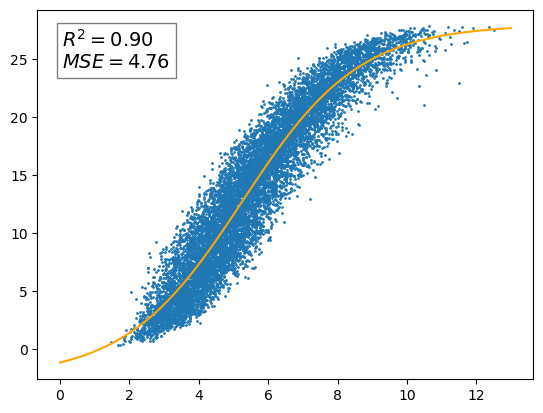

In [10]:
# Set up a figure
fig, ax = plt.subplots()

# plot the scatter of the data
ax.scatter(df['10m_wind_speed'], df['wind_gen'], s=1)

# plot the sigmoid fit
x = np.linspace(0, round(max(df['10m_wind_speed'])), 100)

ax.plot(x, sigmoid(x, *popt), 'r-', label='fit: L=%5.3f, x0=%5.3f, k=%5.3f, b=%5.3f' % tuple(popt), color='orange')

# calculte the r2 value
r2 = r2_score(df['wind_gen'], sigmoid(df['10m_wind_speed'], *popt))

# calculate the mean squared error
mse = mean_squared_error(df['wind_gen'], sigmoid(df['10m_wind_speed'], *popt))

# include these values in a textbox in the top left
textstr = '\n'.join((
    r'$R^2=%.2f$' % (r2, ),
    r'$MSE=%.2f$' % (mse, )))

ax.text(
    0.05,
    0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.5)
)


/tmp/ipykernel_906597/1995215400.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(x, model.predict(x.reshape(-1, 1)), 'r-', label='fit: y=%5.3fx + %5.3f' % (model.coef_[0][0], model.intercept_), color='orange')
/tmp/ipykernel_906597/1995215400.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, model.predict(x.reshape(-1, 1)), 'r-', label='fit: y=%5.3fx + %5.3f' % (model.coef_[0][0], model.intercept_), color='orange')


Text(0.05, 0.95, '$R^2=0.88$\n$MSE=5.60$')

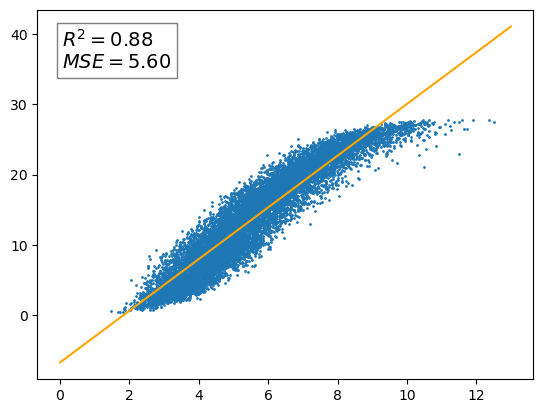

In [11]:
# Quantify a linear regression fit
from sklearn.linear_model import LinearRegression

# set up the linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(df['10m_wind_speed'].values.reshape(-1, 1), df['wind_gen'].values.reshape(-1, 1))

# set up a figure
fig, ax = plt.subplots()

# plot the scatter of the data
ax.scatter(df['10m_wind_speed'], df['wind_gen'], s=1)

# plot the linear regression fit
x = np.linspace(0, round(max(df['10m_wind_speed'])), 100)

ax.plot(x, model.predict(x.reshape(-1, 1)), 'r-', label='fit: y=%5.3fx + %5.3f' % (model.coef_[0][0], model.intercept_), color='orange')

# calculate the r2 value
r2 = model.score(df['10m_wind_speed'].values.reshape(-1, 1), df['wind_gen'].values.reshape(-1, 1))

# calculate the mean squared error
mse = mean_squared_error(df['wind_gen'], model.predict(df['10m_wind_speed'].values.reshape(-1, 1)))

# include these values in a textbox in the top left
textstr = '\n'.join((
    r'$R^2=%.2f$' % (r2, ),
    r'$MSE=%.2f$' % (mse, )))

ax.text(
    0.05,
    0.95,
    textstr,
    transform=ax.transAxes,
    fontsize=14,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(facecolor='white', alpha=0.5)
)

### Compare DnW and synthetic DnW ###

* First compare the demand with demand from temperature (should be the same?).
* Then consider the wind gen against synthetic wind generation (similar-ish).
* Then take the difference between these and compare the demand net wind with synthetic demand net wind.


First process temperature into demand

In [12]:
# Set up the output directory for the dfs
output_dir_dfs = "/gws/nopw/j04/canari/users/benhutch/unseen/saved_dfs"

# load the obs temperature data
df_obs_tas = pd.read_csv(f"{output_dir_dfs}/ERA5_tas_United_Kingdom_1960-2018_daily_2024-11-26.csv")

# Convert time column to datetime
df_obs_tas['time'] = pd.to_datetime(df_obs_tas['time'], origin='1950-01-01', unit='D')

# subset the obs data to O, N, D, J, F, M
df_obs_tas = df_obs_tas[df_obs_tas['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]

# set up a column for the data in celsius
df_obs_tas['tas_c'] = df_obs_tas['data'] - 273.15

Calculate heating degree days and cooling degree days

In [13]:
# Set up hdd and cdd
hdd_base = 15.5
cdd_base = 22.0

# Process the obs data
df_obs_tas['hdd'] = df_obs_tas['tas_c'].apply(lambda x: max(0, hdd_base - x))
df_obs_tas['cdd'] = df_obs_tas['tas_c'].apply(lambda x: max(0, x - cdd_base))

Apply the regression coefficients for the UK to calculate weather dependent demand

In [14]:
# Set up the path to the regression coeffs
regr_coeffs = "/home/users/benhutch/ERA5_energy_update/ERA5_Regression_coeffs_demand_model.csv"

# load the regression coeffs
df_regr = pd.read_csv(regr_coeffs)

# Set the index
df_regr.set_index("Unnamed: 0", inplace=True)

# Rename the columns by splitting by _ and extracting the second element
df_regr.columns = [x.split("_")[0] for x in df_regr.columns]

# if there is a column called "United" replace it with "United Kingdom"
if "United" in df_regr.columns:
    df_regr.rename(columns={"United": "United_Kingdom"}, inplace=True)

# extract the coeffs for the UK
time_coeff_uk = df_regr.loc["time", "United_Kingdom"]
hdd_coeff_uk = df_regr.loc["HDD", "United_Kingdom"]
cdd_coeff_uk = df_regr.loc["CDD", "United_Kingdom"]

# Calculate the obs demand
df_obs_tas["UK_demand"] = (
    (time_coeff_uk * 2017) + # demand year which the model is based on
    (hdd_coeff_uk * df_obs_tas["hdd"]) +
    (cdd_coeff_uk * df_obs_tas["cdd"])
)

In [15]:
df_obs_tas.describe()

,time,data,tas_c,hdd,cdd,UK_demand
count,10753,10753.000000,10753.000000,10753.000000,10753.0,10753.000000
mean,1989-07-02 02:54:29.561982720,278.891664,5.741664,9.758826,0.0,42.351870
min,1960-01-01 00:00:00,266.208392,-6.941608,0.000000,0.0,35.056087
25%,1974-11-16 00:00:00,276.537787,3.387787,7.388341,0.0,40.579675
50%,1989-10-01 00:00:00,278.854584,5.704584,9.795416,0.0,42.379225
75%,2004-02-15 00:00:00,281.261659,8.111659,12.112213,0.0,44.111282
max,2018-12-31 00:00:00,290.817681,17.667681,22.441608,0.0,51.833628
std,NaN,3.476327,3.476327,3.474857,0.0,2.597833


/tmp/ipykernel_906597/1210572660.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, x, 'r-', color='orange')


Text(0, 0.5, 'CLEARHEADS Demand (GW)')

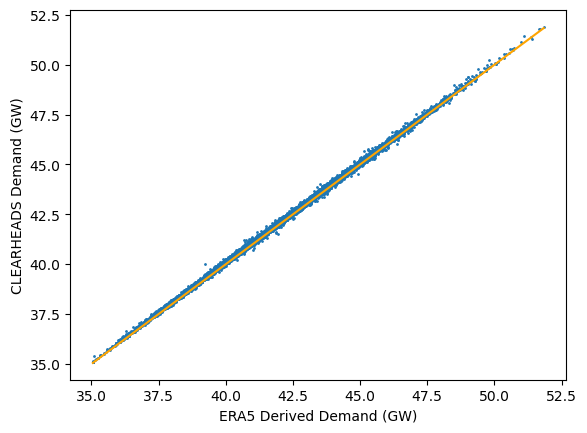

In [16]:
# Compare the derived demand with the observed demand
fig, ax = plt.subplots()

# plot a scatter of the observed demand against the derived demand
ax.scatter(df_obs_tas["UK_demand"], df["United_Kingdom_wd_demand"], s=1)

# include a 1:1 line
x = np.linspace(min(df_obs_tas["UK_demand"]), max(df_obs_tas["UK_demand"]), 100)

ax.plot(x, x, 'r-', color='orange')

# include the axis labels
ax.set_xlabel("ERA5 Derived Demand (GW)")
ax.set_ylabel("CLEARHEADS Demand (GW)")

Happy with the demand method - but do we bias correct temperature before we get to electricity demand or afterwards?

Now look at the translation of wind speeds into wind power generation using the sigmoid fit.

* In the first instance, we will just use the CLEARHEADS 10m wind speed to see how well the sigmoid fit works.
* We also want to quantify the uncertainty around this fit

/tmp/ipykernel_906597/3549293491.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, x, 'r-', color='orange')


Text(0, 0.5, 'CLEARHEADS Wind Generation (GW)')

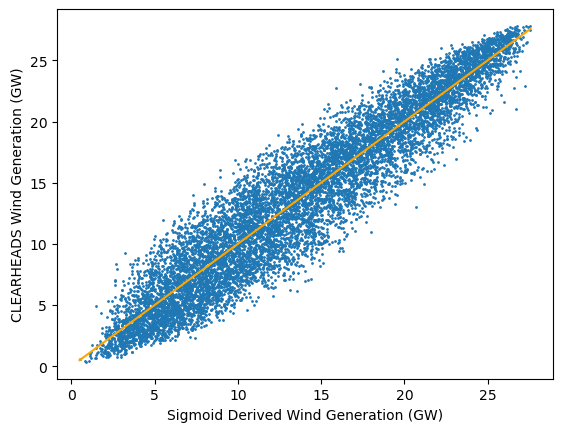

In [17]:
# add a new column - wind_gen_derived
df["wind_gen_derived"] = sigmoid(df['10m_wind_speed'], *popt)

# set up a figure
fig, ax = plt.subplots()

# plot the scatter of the observed wind generation against the derived wind generation
ax.scatter(df["wind_gen_derived"], df["wind_gen"], s=1)

# include a 1:1 line
x = np.linspace(min(df["wind_gen_derived"]), max(df["wind_gen_derived"]), 100)

ax.plot(x, x, 'r-', color='orange')

# include the axis labels
ax.set_xlabel("Sigmoid Derived Wind Generation (GW)")
ax.set_ylabel("CLEARHEADS Wind Generation (GW)")

Now we want to perform many sigmoid fits using bootstrapping to quantify the uncertainty around this.

In [18]:
df.keys()

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'wind_gen_derived'],
      dtype='object')

In [19]:
from tqdm import tqdm
import random

In [20]:
%%time

# Set up the column names
x_col_name = "10m_wind_speed" # predictor
y_col_name = "wind_gen" # target

# Set up the block length - 10 days independent
block_length = 10

# set up the number of trials
nboot = 1000
num_trials = 1000

# Set up the ntimes for the obs
ntimes = len(df_obs_tas["time"].unique())

# Get the number of blocks
nblocks = int(ntimes / block_length)

# if the nblocks * block is less than the ntimes
if (nblocks * block_length) < ntimes:
    # add one to the nblocks
    nblocks = nblocks + 1

# set up the index for time
index_time = range(ntimes - block_length + 1)

# Set up empty arrays for the bootstrapped data
x_boot_full = np.zeros([nboot, ntimes])
y_boot_full = np.zeros([nboot, ntimes])

# Set up an empty array for the residuals
residuals_boot = np.zeros((nboot, ntimes))

# Set up an empty array for the spread
res_spread_boot = np.zeros(nboot)

# set up an empty array for the r2 and rmse values
r2_boot = np.zeros(nboot)
rmse_boot = np.zeros(nboot)

# Loop over the nboot
for iboot in tqdm(np.arange(nboot)):
    # Select starting indices for the blocks
    if iboot == 0:
        ind_time_this = range(0, ntimes, block_length)
    else:  # random samples
        ind_time_this = np.array(
            [random.choice(index_time) for _ in range(nblocks)]
        )

    # Set up the shape of the bootstrapped data
    x_boot = np.zeros(ntimes)
    y_boot = np.zeros(ntimes)

    # Reset the time index
    itime = 0

    # Loop over the indices
    for ithis in ind_time_this:
        # Set up the block index
        ind_block = np.arange(ithis, ithis + block_length)

        # if the block index is greater than the number of times
        # then subtract the number of times from the block index
        ind_block[(ind_block > ntimes - 1)] = (
            ind_block[(ind_block > ntimes - 1)] - ntimes
        )

        # Restrict the block index to the minimum of the block length
        ind_block = ind_block[: min(block_length, ntimes - itime)]

        # loop over the individual blocks
        for iblock in ind_block:
            # set the bootstrapped data
            x_boot[itime] = df[x_col_name].values[iblock]
            y_boot[itime] = df[y_col_name].values[iblock]

            # increment the time index
            itime = itime + 1

    # Append the data
    x_boot_full[iboot, :] = x_boot
    y_boot_full[iboot, :] = y_boot

    # If this is the first bootstrapped sample
    if iboot == 0: # first sample
        # set up the sigmoid fit
        popt_first, pcov_first = curve_fit(
            sigmoid, x_boot, y_boot, p0=p0, method="dogbox"
        )

        # Make the precitions of y
        y_pred_first = sigmoid(x_boot, *popt_first)

        # Calculate the first r2 value
        r2_first = r2_score(y_boot, y_pred_first)

        # Calculate the first rmse value
        rmse_first = mean_squared_error(y_boot, y_pred_first)

        # Calculae the first residuals
        residuals_first = y_pred_first - y_boot

        # Calculate the spread of the residuals
        res_spread_first = np.std(residuals_first)
    else: # random samples
        # set up the sigmoid fit
        popt_this, pcov_this = curve_fit(
            sigmoid, x_boot, y_boot, p0=p0, method="dogbox"
        )

        # Make the precitions of y
        y_pred_this = sigmoid(x_boot, *popt_this)

        # Calculate the r2 value
        r2_this = r2_score(y_boot, y_pred_this)

        # Calculate the rmse value
        rmse_this = mean_squared_error(y_boot, y_pred_this)

        # Calculate the residuals
        residuals_this = y_pred_this - y_boot

        # Calculate the spread of the residuals
        res_spread_this = np.std(residuals_this)

        # Append the residuals
        residuals_boot[iboot, :] = residuals_this

        # Append the spread of the residuals
        res_spread_boot[iboot] = res_spread_this

        # Append the r2 and rmse values
        r2_boot[iboot] = r2_this
        rmse_boot[iboot] = rmse_this

# Quantify the 5th, 50th and 95th percentiles of the residual std
res_spread_5th = np.percentile(res_spread_boot, 5)
res_spread_50th = np.percentile(res_spread_boot, 50)
res_spread_95th = np.percentile(res_spread_boot, 95)

# Print the estimates of the residuals
print(f"5th percentile of the residuals sigma: {res_spread_5th}")
print(f"50th percentile of the residuals sigma: {res_spread_50th}")
print(f"95th percentile of the residuals sigma: {res_spread_95th}")

# Create a stochastic fit with the upper bounds of the spread
stoch_95 = np.random.normal(0, res_spread_95th, size=(len(df["10m_wind_speed"]), num_trials))

# Create a stochastic fit with the lower bounds of the spread
stoch_5 = np.random.normal(0, res_spread_5th, size=(len(df["10m_wind_speed"]), num_trials))

# Create a stochastic fit with the median bounds of the spread
stoch_50 = np.random.normal(0, res_spread_50th, size=(len(df["10m_wind_speed"]), num_trials))

# create a new column for the stochastic fit
df["wind_gen_pred"] = y_pred_first

# add the random trials to the deterministic model time series
trials_95 = pd.DataFrame(
    df["wind_gen_pred"].values[:, np.newaxis] + stoch_95,
    index=df.index,
    columns=range(num_trials),
)

trials_5 = pd.DataFrame(
    df["wind_gen_pred"].values[:, np.newaxis] + stoch_5,
    index=df.index,
    columns=range(num_trials),
)

trials_50 = pd.DataFrame(
    df["wind_gen_pred"].values[:, np.newaxis] + stoch_50,
    index=df.index,
    columns=range(num_trials),
)

# Group the trials by day and calculate the mean
trials_95_grp_mean = trials_95.groupby(trials_95.index.date).mean()
trials_5_grp_mean = trials_5.groupby(trials_5.index.date).mean()
trials_50_grp_mean = trials_50.groupby(trials_50.index.date).mean()

# cacllate the 5th and 95th percentiles of the trials
p05_95, p95_95 = [trials_95_grp_mean.T.quantile(x) for x in [0.05, 0.95]]

p05_05, p95_05 = [trials_5_grp_mean.T.quantile(x) for x in [0.05, 0.95]]

p05_50, p95_50 = [trials_50_grp_mean.T.quantile(x) for x in [0.05, 0.95]]


# Convert these all to dataframes
p05_95 = p05_95.to_frame() ; p95_95 = p95_95.to_frame()
p05_05 = p05_05.to_frame() ; p95_05 = p95_05.to_frame()
p05_50 = p05_50.to_frame() ; p95_50 = p95_50.to_frame()

# reset the index
p05_95.reset_index(inplace=True) ; p95_95.reset_index(inplace=True)
p05_05.reset_index(inplace=True) ; p95_05.reset_index(inplace=True)
p05_50.reset_index(inplace=True) ; p95_50.reset_index(inplace=True)


# Set the column names
p05_95.columns = ["index", f"{y_col_name}_p05_95"]
p95_95.columns = ["index", f"{y_col_name}_p95_95"]

p05_05.columns = ["index", f"{y_col_name}_p05_05"]
p95_05.columns = ["index", f"{y_col_name}_p95_05"]

p05_50.columns = ["index", f"{y_col_name}_p05_50"]
p95_50.columns = ["index", f"{y_col_name}_p95_50"]

# add these columns to the full dataframe
# # matching where the index is the same as the "index" column in the p05_95 dataframe
# df = df.merge(p05_95, left_on="date", right_on="index", how="left")

100%|██████████| 1000/1000 [00:53<00:00, 18.58it/s]


5th percentile of the residuals sigma: 2.1527905901646935
50th percentile of the residuals sigma: 2.18106037542255
95th percentile of the residuals sigma: 2.208356473255248
CPU times: user 42min 53s, sys: 702 ms, total: 42min 54s
Wall time: 55.6 s


In [21]:
# ensure that the index is a datetime object
p05_95["index"] = pd.to_datetime(p05_95["index"])
p95_95["index"] = pd.to_datetime(p95_95["index"])

p05_05["index"] = pd.to_datetime(p05_05["index"])
p95_05["index"] = pd.to_datetime(p95_05["index"])

p05_50["index"] = pd.to_datetime(p05_50["index"])
p95_50["index"] = pd.to_datetime(p95_50["index"])

# set this as the index
p05_95.set_index("index", inplace=True)
p95_95.set_index("index", inplace=True)

p05_05.set_index("index", inplace=True)
p95_05.set_index("index", inplace=True)

p05_50.set_index("index", inplace=True)
p95_50.set_index("index", inplace=True)

In [22]:
# add new columsn in df
df[f"{y_col_name}_p05_95"] = p05_95[f"{y_col_name}_p05_95"]
df[f"{y_col_name}_p95_95"] = p95_95[f"{y_col_name}_p95_95"]

df[f"{y_col_name}_p05_05"] = p05_05[f"{y_col_name}_p05_05"]
df[f"{y_col_name}_p95_05"] = p95_05[f"{y_col_name}_p95_05"]

df[f"{y_col_name}_p05_50"] = p05_50[f"{y_col_name}_p05_50"]
df[f"{y_col_name}_p95_50"] = p95_50[f"{y_col_name}_p95_50"]

In [23]:
# limit df to the first 90 days
df_limit = df[:90]

In [24]:
df_limit.head()

,solar_power,100m_wind_speed,10m_wind_speed,solar_irradiance,ofs_cfs,ons_cfs,t2m_no_detrend,t2m_2020_detrend,United_Kingdom_demand,United_Kingdom_wd_demand,...,demand_net_wind,wd_demand_net_wind,wind_gen_derived,wind_gen_pred,wind_gen_p05_95,wind_gen_p95_95,wind_gen_p05_05,wind_gen_p95_05,wind_gen_p05_50,wind_gen_p95_50
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.017302,7.625868,5.137020,47.696808,0.766016,0.298726,6.577980,7.835584,40.766836,41.666578,...,25.022648,25.922391,12.220771,12.220771,8.432625,15.953017,8.895240,15.655437,8.675099,15.983144
1960-01-02,0.016300,4.930154,3.186221,44.535210,0.161353,0.101100,3.956466,5.214012,40.019199,43.863111,...,36.135318,39.979230,4.448387,4.448387,1.070302,8.176342,1.027504,7.975758,0.847816,8.292179
1960-01-03,0.014511,7.249626,4.753627,39.765705,0.298246,0.266276,5.730921,6.988410,37.949476,42.640292,...,29.590107,34.280923,10.507048,10.507048,7.059558,14.252724,6.733608,14.093436,6.921646,13.908295
1960-01-04,0.016632,9.558028,6.228839,46.044937,0.526643,0.363619,7.894082,9.151514,39.775870,40.584140,...,26.599156,27.407426,17.033797,17.033797,13.214494,20.726746,13.419394,20.462263,13.261368,20.499313
1960-01-05,0.026247,8.874397,6.005377,71.949350,0.798906,0.376032,5.362875,6.620249,42.761398,42.761398,...,25.382651,25.382651,16.087564,16.087564,12.504643,19.801589,12.384983,19.869429,12.613932,19.619282


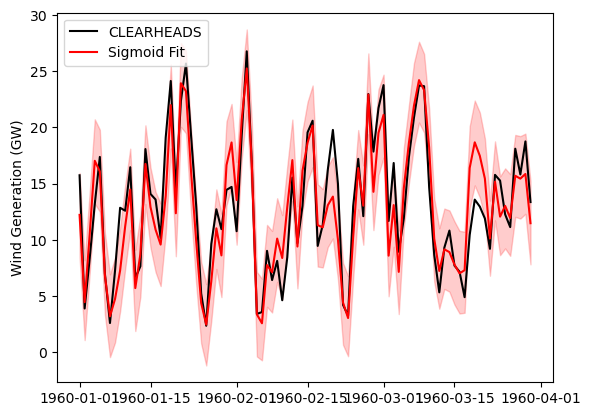

In [25]:
# Plot the central estimate and the 5-95th percentile
fig, ax = plt.subplots()

# Plot the first 100 value of wind gen
ax.plot(df_limit["wind_gen"], label="CLEARHEADS", color='black')

# Plot the predicted values in red
ax.plot(df_limit["wind_gen_pred"], label="Sigmoid Fit", color='red')

# Plot the 5th and 95th percentiles
ax.fill_between(
    df_limit.index,
    df_limit["wind_gen_p05_95"],
    df_limit["wind_gen_p95_95"],
    color="red",
    alpha=0.2,
)

# # Set the axis labels
# ax.set_xlabel("Time")

ax.set_ylabel("Wind Generation (GW)")

# Include a legend in the top left
ax.legend(loc="upper left")

/tmp/ipykernel_906597/1998617988.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, x, 'r-', color='orange', label="1:1 Line")
/tmp/ipykernel_906597/1998617988.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, model_5.predict(x.reshape(-1, 1)), 'r--', color='red', label="5th-95th Percentile Fit")
/tmp/ipykernel_906597/1998617988.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x, model_95.predict(x.reshape(-1, 1)), 'r--', color='red')


Text(0, 0.5, 'CLEARHEADS Wind Generation (GW)')

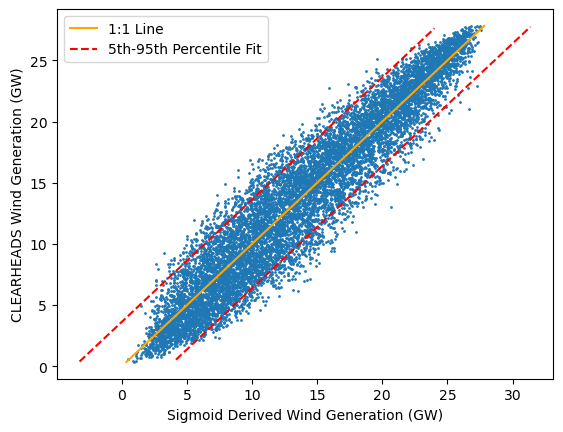

In [26]:
# Scatter plot of the observed wind generation against the predicted wind generation
fig, ax = plt.subplots()

# plot the scatter of the observed wind generation against the predicted wind generation
ax.scatter(df["wind_gen_pred"], df["wind_gen"], s=1)

# include a 1:1 line
x = np.linspace(min(df["wind_gen"]), max(df["wind_gen"]), 100)

ax.plot(x, x, 'r-', color='orange', label="1:1 Line")

# create a simple linear fit for the 5th percentile
model_5 = LinearRegression()

# fit the model to the data
model_5.fit(df["wind_gen_p05_95"].values.reshape(-1, 1), df["wind_gen"].values.reshape(-1, 1))

# create a simple linear fit for the 95th percentile
model_95 = LinearRegression()

# fit the model to the data
model_95.fit(df["wind_gen_p95_95"].values.reshape(-1, 1), df["wind_gen"].values.reshape(-1, 1))

# plot the linear regression fit for the 5th percentile as a dahsed red line
x = np.linspace(min(df["wind_gen_p05_95"]), max(df["wind_gen_p05_95"]), 100)

ax.plot(x, model_5.predict(x.reshape(-1, 1)), 'r--', color='red', label="5th-95th Percentile Fit")

# plot the linear regression fit for the 95th percentile as a dashed red line
x = np.linspace(min(df["wind_gen_p95_95"]), max(df["wind_gen_p95_95"]), 100)

ax.plot(x, model_95.predict(x.reshape(-1, 1)), 'r--', color='red')

# # plot the scatter of the of the 5th and 95th percentiles
# ax.scatter(df["wind_gen_p05_95"], df["wind_gen"], s=1, color='red')

# ax.scatter(df["wind_gen_p95_95"], df["wind_gen"], s=1, color='red')

# include a legend in the top left
ax.legend(loc="upper left")

# include the axis labels
ax.set_xlabel("Sigmoid Derived Wind Generation (GW)")
ax.set_ylabel("CLEARHEADS Wind Generation (GW)")

Now we want to compare several methods of transforming temperature and 10m wind speed into demand net wind. We will compare these as the MSE/R2 over all of the winter time points. The potential methods to use are the following:

1. MLR
2. Demand + wind from linear fit
3. Demand + wind from sigmoid fit
4. Demand + NN wind fit (several predictors?)

Probably makes sense to do the first three first as they are easiest.

In [27]:
df["t2m_no_detrend"]

date
1960-01-01    6.577980
1960-01-02    3.956466
1960-01-03    5.730921
1960-01-04    7.894082
1960-01-05    5.362875
                ...   
2018-12-27    7.486191
2018-12-28    7.666619
2018-12-29    8.513406
2018-12-30    8.967217
2018-12-31    9.117616
Name: t2m_no_detrend, Length: 10753, dtype: float64

In [28]:
# Convert t2m_no_detrend to electricity demand
df["hdd"] = df["t2m_no_detrend"].apply(lambda x: max(0, hdd_base - x))
df["cdd"] = df["t2m_no_detrend"].apply(lambda x: max(0, x - cdd_base))

# Calculate the obs demand
df["UK_demand_derived"] = (
    (time_coeff_uk * 2017) + # demand year which the model is based on
    (hdd_coeff_uk * df["hdd"]) +
    (cdd_coeff_uk * df["cdd"])
)

Now we have demand we can quantify the sigmoid demand net wind

In [29]:
df.keys()

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'wind_gen_derived',
       'wind_gen_pred', 'wind_gen_p05_95', 'wind_gen_p95_95',
       'wind_gen_p05_05', 'wind_gen_p95_05', 'wind_gen_p05_50',
       'wind_gen_p95_50', 'hdd', 'cdd', 'UK_demand_derived'],
      dtype='object')

In [30]:
# calculate the demand net wind
df["UK_demand_net_wind_sigmoid"] = df["UK_demand_derived"] - df["wind_gen_pred"]

In [31]:
# Quantify the MLR fit
x_predictors = df[["10m_wind_speed", "t2m_no_detrend"]]
y_target = df["wd_demand_net_wind"]

# set up the linear regression model
model = LinearRegression().fit(x_predictors, y_target)

# Predict the new values
df["wd_demand_net_wind_MLR"] = model.predict(x_predictors)

In [32]:
# Quantify the linear fit of 10m wind speed to wind generation
x_predictor = df["10m_wind_speed"]
y_target = df["wind_gen"]

# set up the linear regression model
model = LinearRegression().fit(x_predictor.values.reshape(-1, 1), y_target.values.reshape(-1, 1))

# Predict the new values
df["wind_gen_linear"] = model.predict(x_predictor.values.reshape(-1, 1))

# Calculate the wd_demand_net_wind_linear
df["wd_demand_net_wind_linear"] = df["UK_demand_derived"] - df["wind_gen_linear"]

In [33]:
# Set up a list of the predictors
predictor_names = ["wd_demand_net_wind_MLR", "wd_demand_net_wind_linear", "UK_demand_net_wind_sigmoid"]

# Set up the target
target_name = "wd_demand_net_wind"

# Loop over the predictors
for predictor_name in predictor_names:
    # Set up the predictor and target
    x_predictor = df[predictor_name]
    y_target = df[target_name]

    # Calculate the r2 value
    r2 = r2_score(y_target, x_predictor)

    # Calculate the mean squared error
    mse = mean_squared_error(y_target, x_predictor)

    # Print the r2 and mse values
    print(f"Predictor: {predictor_name}, R2: {r2:.2f}, MSE: {mse:.2f}")

Predictor: wd_demand_net_wind_MLR, R2: 0.91, MSE: 5.81
Predictor: wd_demand_net_wind_linear, R2: 0.90, MSE: 5.87
Predictor: UK_demand_net_wind_sigmoid, R2: 0.92, MSE: 5.01


Now the test is whether we can do better with a simple neural network, using the following predictors to directly predict weather dependent demand net wind.

* 10m wind speed
* Temperature
* Day-of-year
* MSLP (?)
* Year (?)

In [102]:
# First set up the class for the dataset
from typing import Optional, List, Dict, Tuple, Any

# import some useful functions here, see https://pytorch.org/docs/stable/torch.html
# where `tensor` and `eye` are used for constructing tensors,
# and using a lower-precision float32 is advised for performance
from torch import tensor, float32, eye

from torch.utils.data import Dataset
from torchvision.transforms import Compose
# from palmerpenguins import load_penguins


class DemandNetWindDataset(Dataset):
    """Demand net wind dataset class.

    Parameters
    ----------
    input_keys : List[str]
        The column titles to use in the input feature vectors.
    target_keys : List[str]
        The column titles to use in the target feature vectors.
    train : bool
        If ``True``, this object will serve as the training set, and if
        ``False``, the validation set.

    Notes
    -----

    """

    def __init__(
        self,
        dataframe: pd.DataFrame,
        input_keys: List[str],
        target_keys: List[str],
        train: bool,
        x_tfms: Optional[Compose] = None,
        y_tfms: Optional[Compose] = None,
    ):
        """Build DemandNetWindDataset object. """
        self.input_keys = input_keys
        self.target_keys = target_keys
        self.train = train

        data = dataframe.copy()
        data = (
            data.loc[~data.isna().any(axis=1)]
            .sort_values(by=sorted(data.keys()))
            .reset_index(drop=True)
        )
        # Transform the sex field into a float, with male represented by 1.0, female by 0.0
        # data.sex = (data.sex == "male").astype(float)
        self.dataframe = data
        
        # ensure the index is a datetime object
        self.dataframe.index = pd.to_datetime(self.dataframe.index)

        # Split the dataframe into training and validation sets
        if self.train:
            self.split = self.dataframe[self.dataframe.index.year < 1998]
        else:
            self.split = self.dataframe[self.dataframe.index.year >= 1998]

        # # Ensure the index is a DatetimeIndex
        # self.full_df.index = pd.to_datetime(self.full_df.index)

        # # Limit the valid df to years 1998-2018
        # valid_df = self.full_df[self.full_df.index.year.isin(range(1998, 2019))]

        # # The training items are simply the items *not* in the valid split
        # train_df = self.full_df.loc[~self.full_df.index.isin(valid_df.index)]

        # self.split = {"train": train_df, "valid": valid_df}[
        #     "train" if train is True else "valid"
        # ]

        self.x_tfms = x_tfms
        self.y_tfms = y_tfms

    def __len__(self) -> int:
        """Return the length of requested split.

        Returns
        -------
        int
            The number of items in the dataset.

        """
        return len(self.split)

    def __getitem__(self, idx: int) -> Tuple[Any, Any]:
        """Return an input-target pair.

        Parameters
        ----------
        idx : int
            Index of the input-target pair to return.

        Returns
        -------
        in_feats : Any
            Inputs.
        target : Any
            Targets.

        """
        
        feats = self.split.iloc[idx][self.input_keys].values

        tgts = self.split.iloc[idx][self.target_keys].values

        if self.x_tfms is not None:
            feats = self.x_tfms(feats)

        if self.y_tfms is not None:
            tgts = self.y_tfms(tgts)

        return feats, tgts

In [87]:
df.head()

,solar_power,100m_wind_speed,10m_wind_speed,solar_irradiance,ofs_cfs,ons_cfs,t2m_no_detrend,t2m_2020_detrend,United_Kingdom_demand,United_Kingdom_wd_demand,...,wind_gen_p95_05,wind_gen_p05_50,wind_gen_p95_50,hdd,cdd,UK_demand_derived,UK_demand_net_wind_sigmoid,wd_demand_net_wind_MLR,wind_gen_linear,wd_demand_net_wind_linear
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.017302,7.625868,5.137020,47.696808,0.766016,0.298726,6.577980,7.835584,40.766836,41.666578,...,15.655437,8.675099,15.983144,8.922020,0,41.726266,29.505495,29.762188,12.141293,29.584973
1960-01-02,0.016300,4.930154,3.186221,44.535210,0.161353,0.101100,3.956466,5.214012,40.019199,43.863111,...,7.975758,0.847816,8.292179,11.543534,0,43.686133,39.237746,39.082565,4.960277,38.725856
1960-01-03,0.014511,7.249626,4.753627,39.765705,0.298246,0.266276,5.730921,6.988410,37.949476,42.640292,...,14.093436,6.921646,13.908295,9.769079,0,42.359535,31.852487,31.854453,10.730001,31.629534
1960-01-04,0.016632,9.558028,6.228839,46.044937,0.526643,0.363619,7.894082,9.151514,39.775870,40.584140,...,20.462263,13.261368,20.499313,7.605918,0,40.742337,23.708540,24.664399,16.160353,24.581983
1960-01-05,0.026247,8.874397,6.005377,71.949350,0.798906,0.376032,5.362875,6.620249,42.761398,42.761398,...,19.869429,12.613932,19.619282,10.137125,0,42.634689,26.547126,27.483440,15.337774,27.296916


In [88]:
# Set up the features used to predict the target
features = ["t2m_no_detrend", "10m_wind_speed"]
target = "wd_demand_net_wind"

# Set up the dataset
data_set = DemandNetWindDataset(
    dataframe=df,
    input_keys=features,
    target_keys=[target],
    train=True, # Train on 1960-1997
)

# Loop over the dataset to show the inpute features and target
for _, (in_feats, target) in zip(range(10), data_set):
    print(f"Input Features: {in_feats}, Target: {target}")

Index: 0
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [5.989184  1.7203113]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [42.33555453]
Input Features: [5.989184  1.7203113], Target: [42.33555453]
Index: 1
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [9.21839   1.4760422]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [39.3776327]
Input Features: [9.21839   1.4760422], Target: [39.3776327]
Index: 2
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [1.4709934 1.6767831]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [45.63981847]
Input Features: [1.4709934 1.6767831], Target: [45.63981847]
Index: 3
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [0.93383247 1.8159469 ]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [45.9676326]
Input Features: [0.93383247 1.8159469 ], Target: [45.9676326]
Index: 4
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [0.

In [89]:
# Set up the mean of the training split
train_set = DemandNetWindDataset(
    dataframe=df,
    input_keys=features,
    target_keys=[target],
    train=True, # Train on 1960-1997
)

# Set up the training mean of the target (demand net wind)
training_mean = train_set.split.wd_demand_net_wind.mean()

In [90]:
training_mean

np.float64(28.655959936312353)

In [94]:
train_mean = 28.655959936312353

In [95]:
train_mean

28.655959936312353

In [96]:
type(train_mean)

float

In [97]:
type(training_mean)

numpy.float64

In [98]:
# Now we want to apply transforms to the data to make it more suitable for training
def get_input_transforms() -> Compose:
    """Return transforms which map from raw inputs to tensors.

    Returns
    -------
    Compose
        A composition of transforms (callable functions) to map the tuple
        of input features (``Tuple[float, ...]``) to a ``torch.Tensor``.

    """
    return Compose([lambda x: tensor(x, dtype=float32)])


def get_target_tfms() -> Compose:
    """Return transforms which map from the raw targets to tensors.

    Returns
    -------
    Compose
        A composition of transforms (callable functions) to map the tuple
        of target features (``Tuple[str]``) to a ``torch.Tensor``.

    Notes
    -----
    Note the rescaling by dividing out the training mean.

    """

    # # print the training mean
    # print(f"Training Mean: {training_mean}")

    # # print x
    # print(f"X: {x}")

    # # print the type of training mean
    # print(f"Type of Training Mean: {type(train_mean)}")

    return Compose([lambda x: tensor(x, dtype=float32) / train_mean])

In [99]:
df.keys()

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'wind_gen_derived',
       'wind_gen_pred', 'wind_gen_p05_95', 'wind_gen_p95_95',
       'wind_gen_p05_05', 'wind_gen_p95_05', 'wind_gen_p05_50',
       'wind_gen_p95_50', 'hdd', 'cdd', 'UK_demand_derived',
       'UK_demand_net_wind_sigmoid', 'wd_demand_net_wind_MLR',
       'wind_gen_linear', 'wd_demand_net_wind_linear'],
      dtype='object')

In [104]:
# Set up the train set and valid set using the transforms
train_set = DemandNetWindDataset(
    dataframe=df,
    input_keys=features,
    target_keys=["wd_demand_net_wind"],
    train=True,
    x_tfms=get_input_transforms(),
    y_tfms=get_target_tfms(),
)

valid_set = DemandNetWindDataset(
    dataframe=df,
    input_keys=features,
    target_keys=["wd_demand_net_wind"],
    train=False,
    x_tfms=get_input_transforms(),
    y_tfms=get_target_tfms(),
)

# # Loop over the dataset to show the inpute features and target
# for _, (in_feats, target) in zip(range(10), train_set):
#     print(f"Input Features: {in_feats}, Target: {target}")

Target Keys: ['wd_demand_net_wind']
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Target Keys: ['wd_demand_net_wind']
Input Keys: ['t2m_no_detrend', '10m_wind_speed']


In [105]:
for _, (in_feats, target) in zip(range(10), train_set):
    print(f"Input Features: {in_feats}, Target: {target}")

Index: 0
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [5.989184  1.7203113]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [42.33555453]
Input Features: tensor([5.9892, 1.7203]), Target: tensor([1.4774])
Index: 1
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [9.21839   1.4760422]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [39.3776327]
Input Features: tensor([9.2184, 1.4760]), Target: tensor([1.3742])
Index: 2
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [1.4709934 1.6767831]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [45.63981847]
Input Features: tensor([1.4710, 1.6768]), Target: tensor([1.5927])
Index: 3
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [0.93383247 1.8159469 ]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [45.9676326]
Input Features: tensor([0.9338, 1.8159]), Target: tensor([1.6041])
Index: 4
Input Keys: ['t2m_no_detrend', '10m_wind_speed'

Create dataloaders to do the processing in batching.

In [106]:
from torch.utils.data import DataLoader

# set up a batch size
batch_size = 16

# Set up the train loader
train_loader = DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True,
)

# Set up the valid loader
valid_loader = DataLoader(
    valid_set,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
)

# Loop over the train loader
for batch, targets in valid_loader:
    print(f"batch shape: {batch.shape}, target shape: {targets.shape}")

In [107]:
# loop over the train loader
for batch, targets in train_loader:
    print(f"batch shape: {batch.shape}, target shape: {targets.shape}")

Index: 7378
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [4.6336665 6.313379 ]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [28.66551851]
Index: 8990
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [3.7915847 7.5784564]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [21.01425403]
Index: 9948
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [4.4791713 8.277166 ]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [18.52738328]
Index: 5172
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [7.361557 5.447613]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [33.64772179]
Index: 7684
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [8.645611  6.3113494]
Target Keys: ['wd_demand_net_wind']
Target Keys Values: [22.58131811]
Index: 9136
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [10.90175    7.6580358]
Target Keys: ['wd_demand_net_wind']
Ta

Steal Jim Denholms neural net structure from his GitHub.

In [108]:
pip install git+https://github.com/jdenholm/TorchTools.git

  Cloning https://github.com/jdenholm/TorchTools.git to /tmp/pip-req-build-9cyem4cg
  Running command git clone --filter=blob:none --quiet https://github.com/jdenholm/TorchTools.git /tmp/pip-req-build-9cyem4cg
  Resolved https://github.com/jdenholm/TorchTools.git to commit 3f28f60eff539bb7b47be7aac326df262c3c1ba9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 105.8 MB/s eta 0:00:00
  Created wheel for torch_tools: filename=torch_tools-0.12.0-py3-none-any.whl size=44379 sha256=bfe849c82421d69583357db5ea1abfb243fa65d5afefa5aa98a4777636330197
  Stored in directory: /tmp/pip-ephem-wheel-cache-vzqjabko/wheels/60/c6/82/76f5780fd6f5607efcebfedfdcbb5b7fe6d8ce0d9ff892dcfe
Successfully built torch_tools
Note: you may need to restart the kernel to use updated packages.


Here we are going to use FCNet, documented here https://jdenholm.github.io/TorchTools/models.html

In [111]:
from torch_tools import FCNet

# Set up the model
model = FCNet(
    in_feats=len(features),
    out_feats=1,
    hidden_sizes=(16, 4, 4),
    input_bnorm=True, # apply batch normalisation to the input
    input_dropout=0.1, # apply a dropout of 0.1 to the input
    hidden_dropout=0.1, # apply a dropout of 0.1 to the hidden layers
    hidden_bnorm=True, # apply batch normalisation to the hidden layers
)

# Print the model
print(model)

FCNet(
  (0): InputBlock(
    (0): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (1): DenseBlock(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): LeakyReLU(negative_slope=0.1)
  )
  (2): DenseBlock(
    (0): Linear(in_features=16, out_features=4, bias=True)
    (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): LeakyReLU(negative_slope=0.1)
  )
  (3): DenseBlock(
    (0): Linear(in_features=4, out_features=4, bias=True)
    (1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.1, inplace=False)
    (3): LeakyReLU(negative_slope=0.1)
  )
  (4): DenseBlock(
    (0): Linear(in_features=4, out_features=1, bias=True)
  )
)


Use the mean squared error loss function.

In [112]:
from torch.nn import MSELoss

loss_func = MSELoss()

Use the adam optimiser.

In [113]:
# Create an optimiser and give it the model's parameters.
from torch.optim import Adam

optimiser = Adam(model.parameters(), lr=1e-3)

Write basic training and validation loops.

In [83]:
type(df["10m_wind_speed"].values)

numpy.ndarray

In [85]:
type(df["t2m_no_detrend"].values)

numpy.ndarray

In [84]:
type(df["wd_demand_net_wind"].values)

numpy.ndarray

In [82]:
for _, (in_feats, target) in zip(range(10), train_set):
    print(f"Input Features: {in_feats}, Target: {target}")

Index: 0
Input Keys: ['t2m_no_detrend', '10m_wind_speed']
Input Keys Values: [5.989184  1.7203113]
Target Keys: [array([38.55397857])]


KeyError: "None of [Index([(38.55397857322943,)], dtype='object')] are in the [index]"

Most points captured in the uncertainty range around the deterministic fit

We want to propogate this wind generation uncertainty through to the no. exceedance days and severity count to see how much it affects these final totals.

In [66]:
df.keys()

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'wind_gen_derived',
       'wind_gen_pred', 'wind_gen_p05_95', 'wind_gen_p95_95',
       'wind_gen_p05_05', 'wind_gen_p95_05', 'wind_gen_p05_50',
       'wind_gen_p95_50'],
      dtype='object')

In [67]:
df_obs_tas.keys()

Index(['time', 'data', 'tas_c', 'hdd', 'cdd', 'UK_demand'], dtype='object')

In [91]:
# set time as datetime
df_obs_tas["time"] = pd.to_datetime(df_obs_tas["time"])

# set time as the index
df_obs_tas.set_index("time", inplace=True)

In [97]:
# Create a new column for demand
full_df["ERA5_derived_demand"] = df_obs_tas["UK_demand"]

In [98]:
full_df["ERA5_derived_demand"].describe()

count    10753.000000
mean        42.351870
std          2.597833
min         35.056087
25%         40.579675
50%         42.379225
75%         44.111282
max         51.833628
Name: ERA5_derived_demand, dtype: float64

In [99]:
# Calculate the deterministic demand net wind generation
full_df["wd_demand_net_wind_derived"] = full_df["ERA5_derived_demand"] - full_df["wind_gen_pred"]

# create a new column for the 5th and 95th percentiles
full_df["wd_demand_net_wind_p05_95"] = full_df["ERA5_derived_demand"] - full_df["wind_gen_p05_95"]
full_df["wd_demand_net_wind_p95_95"] = full_df["ERA5_derived_demand"] - full_df["wind_gen_p95_95"]

In [79]:
df.keys()

Index(['solar_power', '100m_wind_speed', '10m_wind_speed', 'solar_irradiance',
       'ofs_cfs', 'ons_cfs', 't2m_no_detrend', 't2m_2020_detrend',
       'United_Kingdom_demand', 'United_Kingdom_wd_demand', 'wind_gen',
       'demand_net_wind', 'wd_demand_net_wind', 'wind_gen_derived',
       'wind_gen_pred', 'wind_gen_p05_95', 'wind_gen_p95_95',
       'wind_gen_p05_05', 'wind_gen_p95_05', 'wind_gen_p05_50',
       'wind_gen_p95_50', 'ERA5_derived_demand', 'wd_demand_net_wind_derived',
       'wd_demand_net_wind_p05_95', 'wd_demand_net_wind_p95_95'],
      dtype='object')

In [80]:
# rename df
full_df = df

In [107]:
# Therefore use the 92th percentile for exceedance
# loop over the winter years
winter_years = np.arange(1960, 2018 + 1)

# Set up an array to store the severity index
severity_index = np.zeros(len(winter_years))
severity_index_deriv = np.zeros(len(winter_years))
severity_index_deriv_05 = np.zeros(len(winter_years))
severity_index_deriv_95 = np.zeros(len(winter_years))

# Set up an array to store the no. exceedance days
no_exceedance_days = np.zeros(len(winter_years))
no_exceedance_days_deriv = np.zeros(len(winter_years))
no_exceedance_days_deriv_05 = np.zeros(len(winter_years))
no_exceedance_days_deriv_95 = np.zeros(len(winter_years))

# winter mean dnw
winter_mean_dnw = np.zeros(len(winter_years))
winter_mean_dnw_deriv = np.zeros(len(winter_years))
winter_mean_dnw_deriv_05 = np.zeros(len(winter_years))
winter_mean_dnw_deriv_95 = np.zeros(len(winter_years))

# Set up an empty list for the dates
dates_exceedance_values = []
exceedance_values = []

# 92nd percentile of CLEARHEADS wd demand net wind
all_winters_92 = np.percentile(full_df["wd_demand_net_wind"], 92)

# loop over the winter years
for i, year in enumerate(winter_years):
    # Set up the first and last day of the winter
    winter_start = pd.Timestamp(f"{year}-10-01")
    winter_end = pd.Timestamp(f"{year+1}-03-31")

    # subset the data
    df = full_df.loc[winter_start:winter_end]

    # if df includes 29th feb, then drop this row
    if f"{year + 1}-02-29" in df.index:
        print("Dropping 29th Feb")
        df = df.drop(pd.Timestamp(f"{year + 1}-02-29"))

    # apply a boolean mask to the demand net wind value
    # which is true where the demand net wind is greater than the 80% tile value
    mask_ch = df["wd_demand_net_wind"] > all_winters_92
    mask_deriv = df["wd_demand_net_wind_derived"] > all_winters_92
    mask_deriv_05 = df["wd_demand_net_wind_p05_95"] > all_winters_92
    mask_deriv_95 = df["wd_demand_net_wind_p95_95"] > all_winters_92

    # # plot the data as a grey line
    # ax.plot(index_date, df["UK_demand"], color="grey", alpha=0.2)

    # # plot the masked values as red dots
    # ax.plot(index_date[mask], df["UK_demand"][mask], "rx")

    # calculate the severity index
    severity_index[i] = (df["wd_demand_net_wind"][mask_ch] - all_winters_92).sum()
    severity_index_deriv[i] = (df["wd_demand_net_wind_derived"][mask_deriv] - all_winters_92).sum()
    severity_index_deriv_05[i] = (df["wd_demand_net_wind_p05_95"][mask_deriv_05] - all_winters_92).sum()
    severity_index_deriv_95[i] = (df["wd_demand_net_wind_p95_95"][mask_deriv_95] - all_winters_92).sum()

    # calculate the no. exceedance days
    no_exceedance_days[i] = mask_ch.sum()
    no_exceedance_days_deriv[i] = mask_deriv.sum()
    no_exceedance_days_deriv_05[i] = mask_deriv_05.sum()
    no_exceedance_days_deriv_95[i] = mask_deriv_95.sum()

    # winter mean dnw
    winter_mean_dnw[i] = df["wd_demand_net_wind"][mask_ch].mean()
    winter_mean_dnw_deriv[i] = df["wd_demand_net_wind_derived"][mask_deriv].mean()
    winter_mean_dnw_deriv_05[i] = df["wd_demand_net_wind_p05_95"][mask_deriv_05].mean()
    winter_mean_dnw_deriv_95[i] = df["wd_demand_net_wind_p95_95"][mask_deriv_95].mean()

    # format the dates to yyyy-mm-dd
    dates = df.index[mask_ch].strftime("%Y-%m-%d")

    # Add the dates and values to the list
    dates_exceedance_values.extend(df.index[mask_ch])

    # Add the exceedance values to the list
    exceedance_values.extend(df["wd_demand_net_wind"][mask_ch])

# set up a dataframe for the number of exceedance days
df_exceedance_days_obs = pd.DataFrame(
    {
        "severity_ch": severity_index,
        "no_exceedance_days_ch": no_exceedance_days,
        "severity_deriv": severity_index_deriv,
        "no_exceedance_days_deriv": no_exceedance_days_deriv,
        "severity_deriv_05": severity_index_deriv_05,
        "no_exceedance_days_deriv_05": no_exceedance_days_deriv_05,
        "severity_deriv_95": severity_index_deriv_95,
        "no_exceedance_days_deriv_95": no_exceedance_days_deriv_95,
        "winter_mean_dnw_ch": winter_mean_dnw,
        "winter_mean_dnw_deriv": winter_mean_dnw_deriv,
        "winter_mean_dnw_deriv_05": winter_mean_dnw_deriv_05,
        "winter_mean_dnw_deriv_95": winter_mean_dnw_deriv_95,
    },
    index=winter_years,
)

Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb
Dropping 29th Feb


In [101]:
full_df.head()

,solar_power,100m_wind_speed,10m_wind_speed,solar_irradiance,ofs_cfs,ons_cfs,t2m_no_detrend,t2m_2020_detrend,United_Kingdom_demand,United_Kingdom_wd_demand,...,wind_gen_p05_95,wind_gen_p95_95,wind_gen_p05_05,wind_gen_p95_05,wind_gen_p05_50,wind_gen_p95_50,ERA5_derived_demand,wd_demand_net_wind_derived,wd_demand_net_wind_p05_95,wd_demand_net_wind_p95_95
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.017302,7.625868,5.137020,47.696808,0.766016,0.298726,6.577980,7.835584,40.766836,41.666578,...,8.871385,15.977531,8.524999,15.724282,8.981899,15.417704,41.519602,29.298831,32.648217,25.542071
1960-01-02,0.016300,4.930154,3.186221,44.535210,0.161353,0.101100,3.956466,5.214012,40.019199,43.863111,...,0.800061,8.049078,0.885713,7.845556,0.979025,8.040885,43.840163,39.391776,43.040102,35.791085
1960-01-03,0.014511,7.249626,4.753627,39.765705,0.298246,0.266276,5.730921,6.988410,37.949476,42.640292,...,6.894808,14.141011,6.942562,14.140107,6.901562,14.173925,42.451549,31.944501,35.556741,28.310538
1960-01-04,0.016632,9.558028,6.228839,46.044937,0.526643,0.363619,7.894082,9.151514,39.775870,40.584140,...,13.649724,20.833161,13.510002,20.521043,13.304743,20.943243,40.617652,23.583855,26.967928,19.784491
1960-01-05,0.026247,8.874397,6.005377,71.949350,0.798906,0.376032,5.362875,6.620249,42.761398,42.761398,...,12.551832,19.686936,12.519218,19.593642,12.486411,19.708082,42.626252,26.538688,30.074420,22.939316


In [108]:
df_exceedance_days_obs.head()

,severity_ch,no_exceedance_days_ch,severity_deriv,no_exceedance_days_deriv,severity_deriv_05,no_exceedance_days_deriv_05,severity_deriv_95,no_exceedance_days_deriv_95,winter_mean_dnw_ch,winter_mean_dnw_deriv,winter_mean_dnw_deriv_05,winter_mean_dnw_deriv_95
1960,35.786467,18.0,21.079647,11.0,106.689613,32.0,0.495721,1.0,41.644238,41.572432,42.990151,40.151822
1961,73.972244,34.0,56.266289,29.0,203.132151,55.0,5.299711,3.0,41.831755,41.596318,43.349413,41.422671
1962,130.330120,38.0,111.054781,38.0,307.782497,72.0,19.188860,12.0,43.085841,42.578595,43.930858,41.255172
1963,31.710833,20.0,25.260148,15.0,149.414375,52.0,0.289032,1.0,41.241642,41.340111,42.529454,39.945132
1964,37.343381,21.0,24.935426,16.0,161.325443,60.0,0.690074,1.0,41.434357,41.214565,42.344858,40.346175


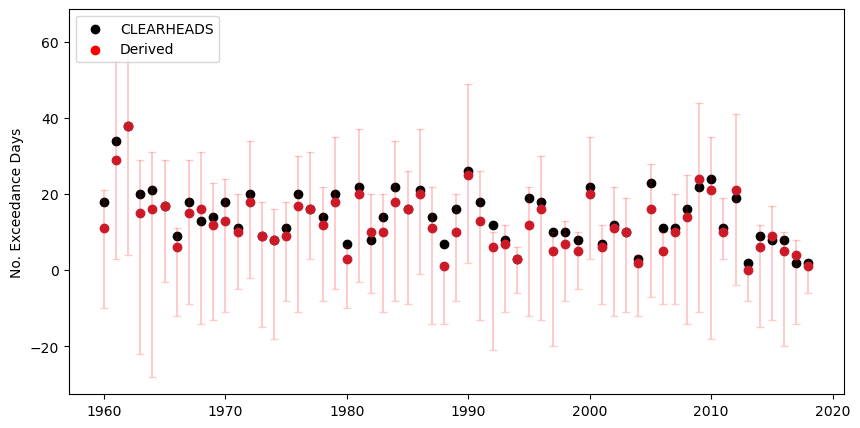

In [105]:
# plot the verificaion of the exceedance days
fig, ax = plt.subplots(figsize=(10, 5))

# plot the number of exceedance daysn ch estimate
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["no_exceedance_days_ch"], label="CLEARHEADS", color='black')

# plot the number of exceedance days derived
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["no_exceedance_days_deriv"], label="Derived", color='red')

# Calculate the error values
y = df_exceedance_days_obs["no_exceedance_days_deriv"]
yerr = [
    df_exceedance_days_obs["no_exceedance_days_deriv_05"] - y,
    y - df_exceedance_days_obs["no_exceedance_days_deriv_95"]
]

# Plot the error bars
ax.errorbar(
    df_exceedance_days_obs.index,
    y,
    yerr=yerr,
    fmt='o',  # Marker style
    ecolor='red',  # Error bar color
    alpha=0.2,  # Transparency of error bars
    capsize=3,  # Length of error bar caps
    linestyle='None'  # No line connecting the markers
)

# Set up the y-label
ax.set_ylabel("No. Exceedance Days")

# set up the legend in the top left
ax.legend(loc="upper left")

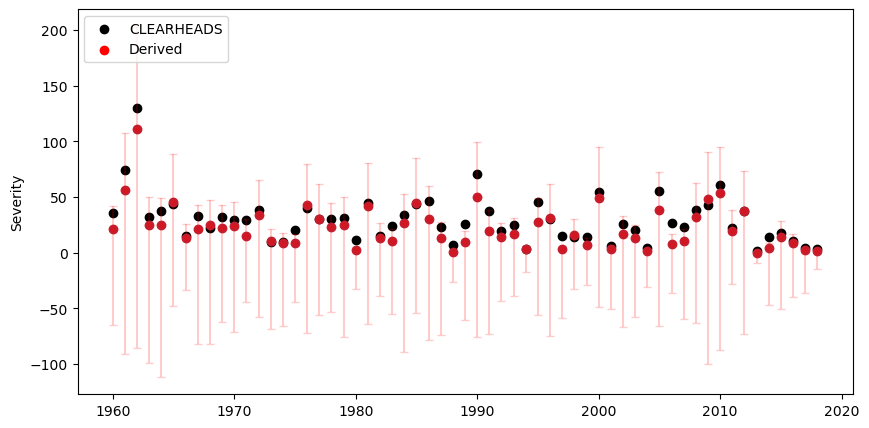

In [106]:
# plot the verificaion of the exceedance days
fig, ax = plt.subplots(figsize=(10, 5))

# plot the number of exceedance daysn ch estimate
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["severity_ch"], label="CLEARHEADS", color='black')

# plot the number of exceedance days derived
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["severity_deriv"], label="Derived", color='red')

# Calculate the error values
y = df_exceedance_days_obs["severity_deriv"]
yerr = [
    df_exceedance_days_obs["severity_deriv_05"] - y,
    y - df_exceedance_days_obs["severity_deriv_95"]
]

# Plot the error bars
ax.errorbar(
    df_exceedance_days_obs.index,
    y,
    yerr=yerr,
    fmt='o',  # Marker style
    ecolor='red',  # Error bar color
    alpha=0.2,  # Transparency of error bars
    capsize=3,  # Length of error bar caps
    linestyle='None'  # No line connecting the markers
)

# Set up the y-label
ax.set_ylabel("Severity")

# set up the legend in the top left
ax.legend(loc="upper left")

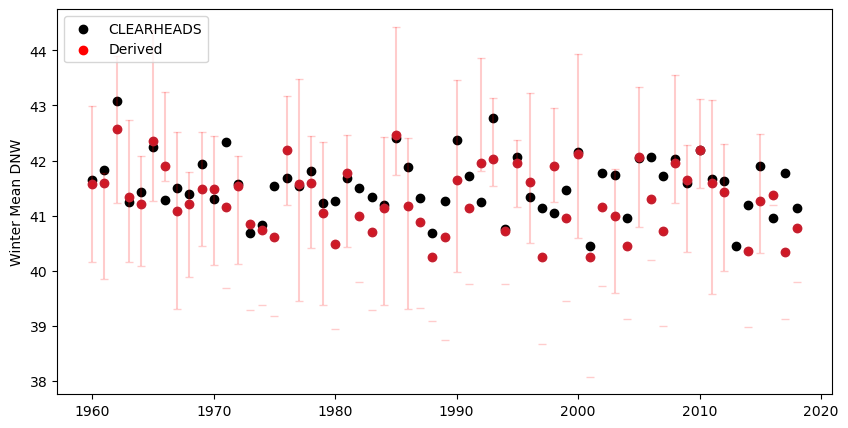

In [112]:
# plot the verificaion of the exceedance days
fig, ax = plt.subplots(figsize=(10, 5))

# plot the number of exceedance daysn ch estimate
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["winter_mean_dnw_ch"], label="CLEARHEADS", color='black')

# plot the number of exceedance days derived
ax.scatter(df_exceedance_days_obs.index, df_exceedance_days_obs["winter_mean_dnw_deriv"], label="Derived", color='red')

# Calculate the error values
y = df_exceedance_days_obs["winter_mean_dnw_deriv"]
yerr = [
    abs(df_exceedance_days_obs["winter_mean_dnw_deriv_05"] - y),
    abs(y - df_exceedance_days_obs["winter_mean_dnw_deriv_95"])
]

# Plot the error bars
ax.errorbar(
    df_exceedance_days_obs.index,
    y,
    yerr=yerr,
    fmt='o',  # Marker style
    ecolor='red',  # Error bar color
    alpha=0.2,  # Transparency of error bars
    capsize=3,  # Length of error bar caps
    linestyle='None'  # No line connecting the markers
)

# Set up the y-label
ax.set_ylabel("Winter Mean DNW")

# set up the legend in the top left
ax.legend(loc="upper left")